In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [2]:
data = pd.read_csv('gas_turbines.csv')

In [3]:
data.head(3)

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468


In [4]:
df = data.drop(columns=['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)

In [5]:
df.head(3)

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [7]:
df.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


<AxesSubplot:ylabel='Count'>

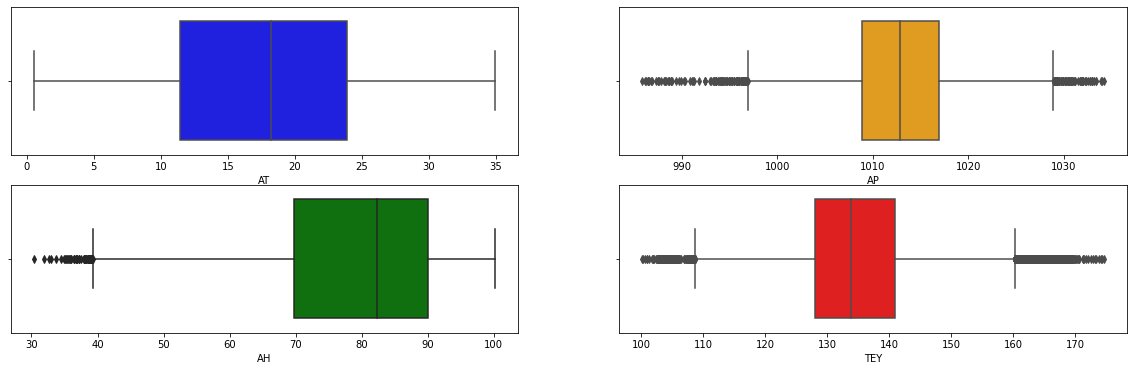

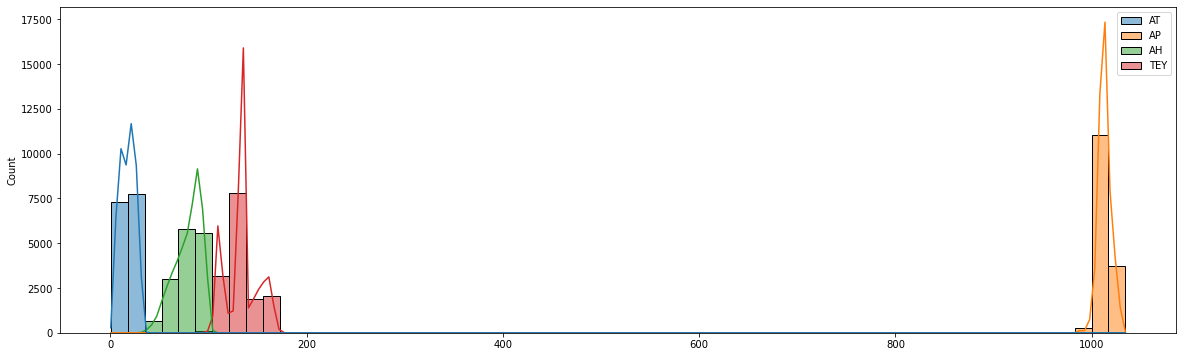

In [8]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,6))
sns.boxplot(data=df,x='AT',orient='h',color='blue',ax=ax1)
sns.boxplot(data=df,x='AP',orient='h',color='orange',ax=ax2)
sns.boxplot(data=df,x='AH',orient='h',color='green',ax=ax3)
sns.boxplot(data=df,x='TEY',orient='h',color='red',ax=ax4)
plt.figure(figsize=(20,6))
sns.histplot(df,kde=True)

<AxesSubplot:xlabel='TEY', ylabel='TEY'>

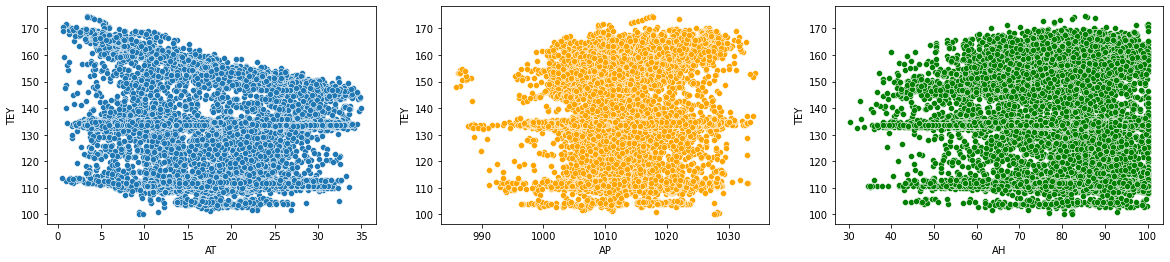

In [9]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,4))
sns.scatterplot(data=df,x='AT',y='TEY',ax=ax1)
sns.scatterplot(data=df,x='AP',y='TEY',color='orange',ax=ax2)
sns.scatterplot(data=df,x='AH',y='TEY',color='green',ax=ax3)
sns.scatterplot(data=df,x='TEY',y='TEY',color='red',ax=ax4)

In [10]:
X = df.drop('TEY',axis=1)
y = df[['TEY']]

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(15, input_dim=3, activation='relu'))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='linear'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                60        
                                                                 
 dense_1 (Dense)             (None, 9)                 144       
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 214
Trainable params: 214
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [17]:
history = model.fit(X_scaled, y, validation_split=0.30, epochs=100, batch_size=20)

Epoch 1/100
527/527 [==============================] - 1s 914us/step - loss: 13546.3418 - mae: 112.8568 - val_loss: 4970.7261 - val_mae: 66.1998
Epoch 2/100
527/527 [==============================] - 0s 785us/step - loss: 1426.4966 - mae: 30.8197 - val_loss: 619.1202 - val_mae: 19.7068
Epoch 3/100
527/527 [==============================] - 0s 733us/step - loss: 501.1392 - mae: 18.1169 - val_loss: 371.3167 - val_mae: 15.4577
Epoch 4/100
527/527 [==============================] - 0s 732us/step - loss: 326.3745 - mae: 14.6365 - val_loss: 276.6268 - val_mae: 13.5722
Epoch 5/100
527/527 [==============================] - 0s 777us/step - loss: 258.0083 - mae: 12.9127 - val_loss: 251.0875 - val_mae: 12.8005
Epoch 6/100
527/527 [==============================] - 0s 734us/step - loss: 233.9221 - mae: 12.1860 - val_loss: 223.6385 - val_mae: 12.1756
Epoch 7/100
527/527 [==============================] - 0s 739us/step - loss: 224.5878 - mae: 11.8518 - val_loss: 219.6901 - val_mae: 12.1036
Epoch 8/

Epoch 59/100
527/527 [==============================] - 0s 728us/step - loss: 212.5250 - mae: 11.4277 - val_loss: 219.4006 - val_mae: 11.9019
Epoch 60/100
527/527 [==============================] - 0s 762us/step - loss: 212.5051 - mae: 11.4453 - val_loss: 204.2050 - val_mae: 11.5952
Epoch 61/100
527/527 [==============================] - 0s 728us/step - loss: 212.7433 - mae: 11.4187 - val_loss: 210.7073 - val_mae: 11.6738
Epoch 62/100
527/527 [==============================] - 0s 734us/step - loss: 212.5869 - mae: 11.4250 - val_loss: 216.3541 - val_mae: 12.0356
Epoch 63/100
527/527 [==============================] - 0s 766us/step - loss: 212.5363 - mae: 11.4449 - val_loss: 215.2988 - val_mae: 11.7207
Epoch 64/100
527/527 [==============================] - 0s 724us/step - loss: 212.6691 - mae: 11.4422 - val_loss: 210.1173 - val_mae: 11.8176
Epoch 65/100
527/527 [==============================] - 0s 791us/step - loss: 212.4532 - mae: 11.4410 - val_loss: 208.6372 - val_mae: 11.5024
Epoch 

In [18]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

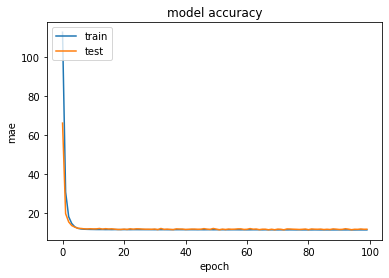

In [19]:
# summarize history for accuracy

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model accuracy')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

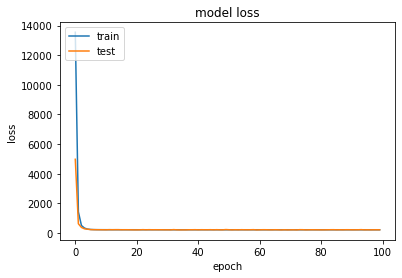

In [20]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
df['predicted_TEY'] = model.predict(X_scaled)
df['predicted_TEY']

0        144.067780
1        144.028610
2        143.484024
3        142.968140
4        142.271790
            ...    
15034    142.303268
15035    143.889954
15036    144.670486
15037    144.733459
15038    144.397614
Name: predicted_TEY, Length: 15039, dtype: float32

In [22]:
from sklearn.metrics import mean_squared_error as mse

In [23]:
np.sqrt(mse(y,df['predicted_TEY']))

14.520701623782378

In [24]:
df.sample(10)

,AT,AP,AH,TEY,predicted_TEY
4607,23.6550,1018.20,72.804,110.67,130.410858
10113,19.6630,1001.50,95.748,151.85,129.911301
5635,25.2000,1014.70,77.908,137.90,131.483414
1945,20.3360,1005.10,75.680,154.37,131.978119
12997,26.3100,1016.70,65.865,133.79,129.807632
4334,26.2650,1009.80,58.380,115.69,133.209381
6995,16.1000,999.14,90.992,109.11,126.672379
5873,22.1370,1014.10,62.571,135.50,132.630096
14530,8.5255,1013.20,90.867,108.69,138.461685
14685,13.6150,1016.40,95.714,132.57,131.008774


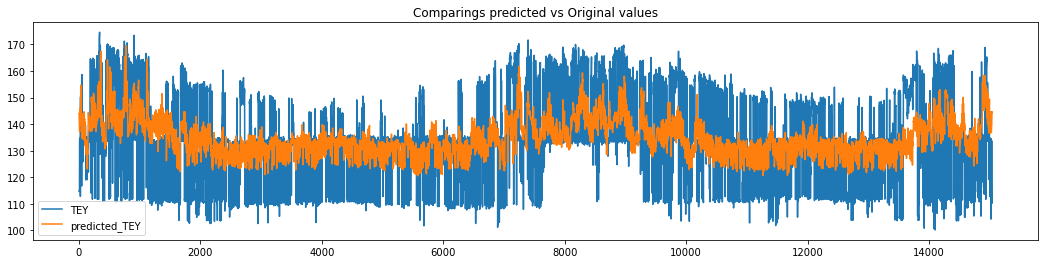

In [25]:
plt.figure(figsize=(18,4))
df['TEY'].plot(legend=True)
df['predicted_TEY'].plot(legend=True)
plt.title('Comparings predicted vs Original values')
plt.show()